# E-commerce — Выявление профилей потребления

### Описание проекта:   
Интернет-магазин товаров для дома «Пока все ещё тут» хочет проанализироватть профили покупателей, а также их сегментировать.

### Цель:  
Выявить профили покупателей, сегментировать их и проанализировать.

Задачи проекта
Провести анализ ассортимента интернет-магазина товаров для дома и быта «Пока все ещё тут» на основе тра### Цель:  
Выявить профили покупателей, сегментировать их и проанализировать.нзакций для отдела закупки и сформулировать рекомендации.

Описание проекта
Интернет-магазином товаров для дома и быта «Пока все ещё тут» была предоставлена база данных о транзакциях.
В данном проекте проведен исследовательский анализ данных EDA, проведена категоризация данных, использовано машинное обучение.
Товары разделены на кластеры: охарактеризованы их основные свойства, проанализированы основные признаки, наиболее сильно влияющие на показатель выручки.
Сформулированы и проверены статистические гипотезы.
Даны рекомендации для повышения эффективности работы магазина

ссылка на презентацию: https://disk.yandex.ru/i/AtHSyBbKckvjnw

### Предобработка данных

In [69]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
#Импортируем библиотеки
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import ydata_profiling as pp
import datetime as dt
from mpl_toolkits import mplot3d

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [70]:
#Создаем датафрейм
data = pd.read_csv('C:/Users/Igor/Downloads/ecommerce_dataset.csv')

In [71]:
#Ознакомимся с данными
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Пропусков нет, надо скоректироватт формат некоторых столбцов

In [73]:
#Приведенм столбцы к формату даты
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
data['date'] = data['date'].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 315.9+ KB


In [74]:
#Проверим наличие явных дубликатов
data.duplicated().sum()

0

Явнях дубликатов нет, неявный дубликаты проверим далее

### Исследовательский анализ

In [75]:
#Посмотрим распределение данных
data.describe()

,order_id,quantity,price
count,6737.000000,6737.000000,6737.000000
mean,43128.948345,2.501559,462.028499
std,27899.414662,15.266478,871.296064
min,12624.000000,1.000000,9.000000
25%,14827.000000,1.000000,101.000000
50%,68503.000000,1.000000,135.000000
75%,70504.000000,1.000000,398.000000
max,73164.000000,1000.000000,14917.000000


In [76]:
#Проверим неявные дубликаты
data_duplicate = data[data[['customer_id', 'order_id', 'product']].duplicated(keep = 'first')]
data_duplicate

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0
...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,Мирт d-9 см h-15 см,1,134.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


In [77]:
#Удаляем 
data = data[~data[['customer_id', 'order_id', 'product']].duplicated()]

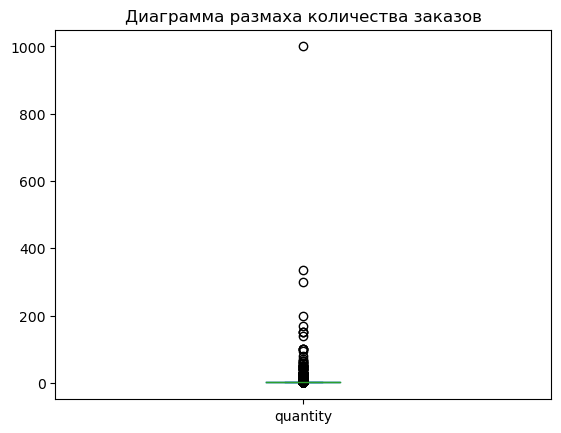

In [78]:
#Исследуем аномалии
data['quantity'].plot(kind='box', title='Диаграмма размаха количества заказов')
plt.show()

In [79]:
data['quantity'].median()

1.0

Среднее значение около 2,5 при этом медианное значение 1, по видимому значительное количество выбросов, которые заметны на графике. Далее конкретизируем выбросы и избавимя от них

In [80]:
#Посмотрим 95 и 99 перцентили по количеству единиц в заказе
percentiles = np.percentile(data['quantity'], [95, 99])
percentiles

array([ 7.5, 30. ])

Примим 99 персентиль за границу выбросов

In [81]:
#Посмотрим  аномальные заказы
data[data['quantity'] >= 30].sort_values(by = 'quantity', ascending = False).head(10)

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20.0
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0
6707,2019-10-28 10:00:00,018fb729-3525-4314-8e4d-1982b1062f9f,73110,"Шпингалет 80 мм белый с пружиной, 1102188",100,44.0


In [82]:
#Выделим отптовых покупателей в отдельный фрейм
data_opt=data[data['quantity'] >= 30]

Как видно из списка данные заказы могут представлять оптовых покупателей, отделим их из основного датафрейма, в реальной жизни я бы проконсультировался с коллегами стоит ли отдельно исследовать данную немногочисленную категорию, пока уделим внимание розниным заказам

In [83]:
#И вырежем их из основного
data=data[data['quantity'] < 30]

In [84]:
data['price'].median()

150.0

Среднее и медианное значени стоимости так же сильно разняться, попробуем определить выбросы

In [85]:
#Посмотрим 95 и 99 перцентили по стоимости
percentiles = np.percentile(data['price'], [95, 99])
percentiles

array([2249.  , 4962.36])

In [86]:
#Посмотрим  аномальные заказы
data[data['price'] >= 4962].sort_values(by = 'price', ascending = False).head(10)

,date,customer_id,order_id,product,quantity,price
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,Сумка-тележка хозяйственная Andersen Royal Sho...,1,8737.0
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,Сумка-тележка хозяйственная Andersen Alu Star ...,1,8437.0
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077.0
6629,2019-10-16 15:00:00,d5584388-ffbe-42fd-a746-a98828ec919f,72992,Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 ...,1,7724.0
2339,2019-03-14 18:00:00,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,Сумка-тележка хозяйственная Rolser IMX006 bass...,1,7679.0
5994,2019-07-30 01:00:00,e2fe6b48-1955-4882-925c-733f545df026,72140,Сумка-тележка хозяйственная Rolser MNB017 fucs...,1,7679.0
654,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,Сумка-тележка хозяйственная Rolser MOU041 malv...,1,7597.0
1241,2018-12-17 17:00:00,86c97bf1-c834-423e-9e38-8acda68f97e8,69417,Гладильная доска Leifheit AirBoard Compact M P...,1,7424.0
6169,2019-08-23 12:00:00,8d85f320-5f55-4647-814c-da1a6b21c2a4,72381,Урна уличная стальная Сальвадор 02.021.0 46х11...,1,7349.0


Дорогостоящие товары немногочисленны, примем за границу стоимость в 4962 единицы, остальное определм как выбросы

In [87]:
#Вырежем их 
data=data[data['price'] < 4962]

### Добавляем стобец с выручкой

In [88]:
data['revenue'] = data['quantity'] * data['price']

In [89]:
data['month'] = data['date'].apply(lambda x: x.strftime('%Y-%m'))
data

,date,customer_id,order_id,product,quantity,price,revenue,month
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10
...,...,...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0,329.0,2019-10
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,404.0,2019-10
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0,2019-10
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,157.0,2019-10


### Добавляем столбец с мясяцами

В базе присутствуют даныне за 1 год и 1 месяц, думаю что месяц будет оптимальной единицей для анализа, так как недель и дней крайне высокое количество

In [90]:
data_month = data.pivot_table(index=['month'], values=['customer_id', 'order_id', 'product', 'quantity', 'price', 'revenue'], 
                    aggfunc={'customer_id': 'nunique', 
                             'order_id': 'nunique', 
                             'product': 'count',
                             'quantity': 'sum',
                             'price': 'mean',
                             'revenue': 'sum'}).round()

data_month

,customer_id,order_id,price,product,quantity,revenue
month,,,,,,
2018-10,177,232,554.0,474,881,319978.0
2018-11,173,197,478.0,420,863,282836.0
2018-12,229,273,772.0,305,523,277282.0
2019-01,147,162,698.0,180,388,208223.0
2019-02,239,279,556.0,352,784,256311.0
2019-03,226,237,446.0,405,725,220241.0
2019-04,230,256,260.0,666,1274,249668.0
2019-05,164,175,209.0,726,1085,197102.0
2019-06,147,154,339.0,287,541,144788.0


''

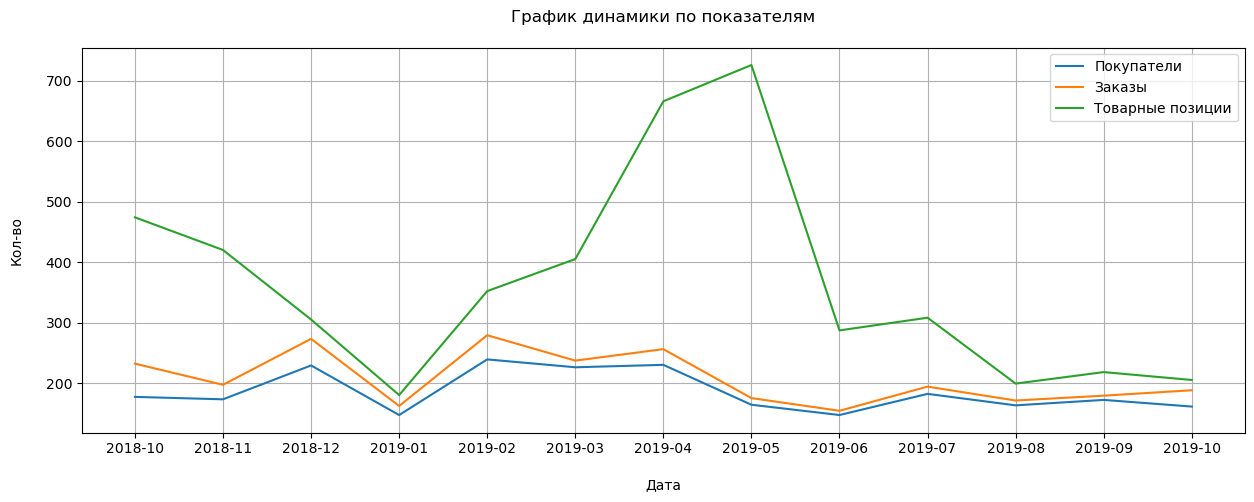

In [91]:
#Построим графики по месяцам
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(data_month.index, data_month['customer_id'], label='Покупатели')
plt.plot(data_month.index, data_month['order_id'], label='Заказы')
plt.plot(data_month.index, data_month['product'], label='Товарные позиции')

plt.legend()
plt.title('График динамики по показателям\n  ')
plt.xlabel('\nДата')
plt.ylabel('Кол-во\n')
;

Количество покупателей и заказов, за исключением января, колеблится не радикально. При этом товарные позиции варьируются весьма значительно. В дальнейшем я буду проверять гипотезу о сезонности в категории товаров растения, которая частично объяснит данные колебания. При этом увеличение ассортимента не приводит к значительному увеличению заказов, и как будет видно на следующем графике - выручки.

''

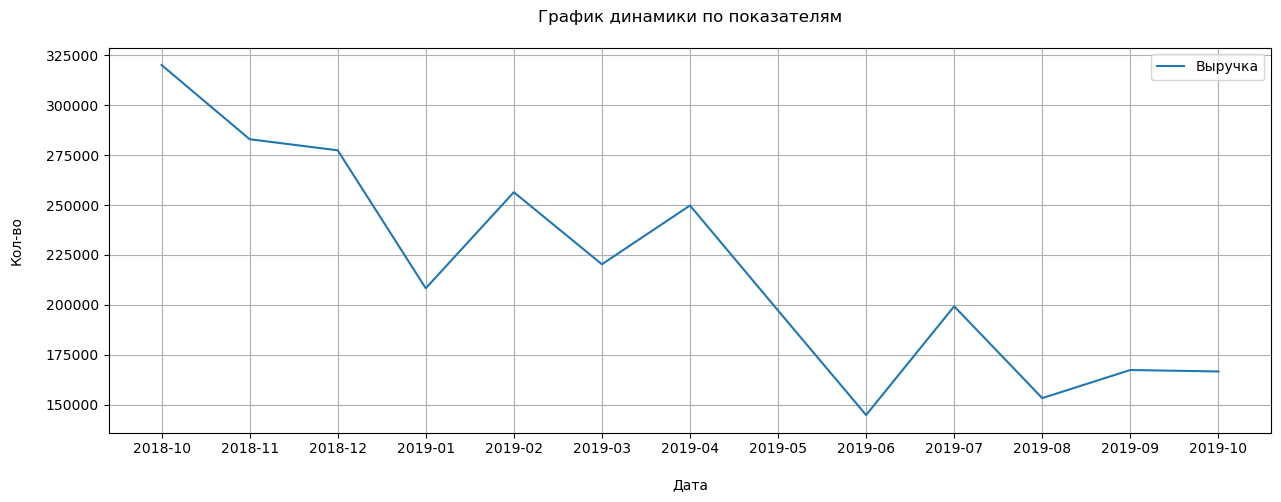

In [92]:
#Построим графики выручки
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(data_month.index, data_month['revenue'], label='Выручка')

plt.legend()
plt.title('График динамики по показателям\n  ')
plt.xlabel('\nДата')
plt.ylabel('Кол-во\n')
;

Выручка волнообразно снижается, при этом она не падает не пропорционально количеству заказов и покупателей.

### Добавляем показатель среднего чека

Сформируем средний чек по заказам, посмотрим его среднее значение по покупателям

In [93]:
data_midle_check = data.pivot_table(index=['order_id'], values=['quantity'], 
                    aggfunc={
                             'quantity': 'sum',}).round()

data_midle_check['order_id'] = data_midle_check.index
data_midle_check.head()

,quantity,order_id
order_id,,
12624,2,12624
13547,3,13547
14480,3,14480
14481,4,14481
14482,2,14482


''

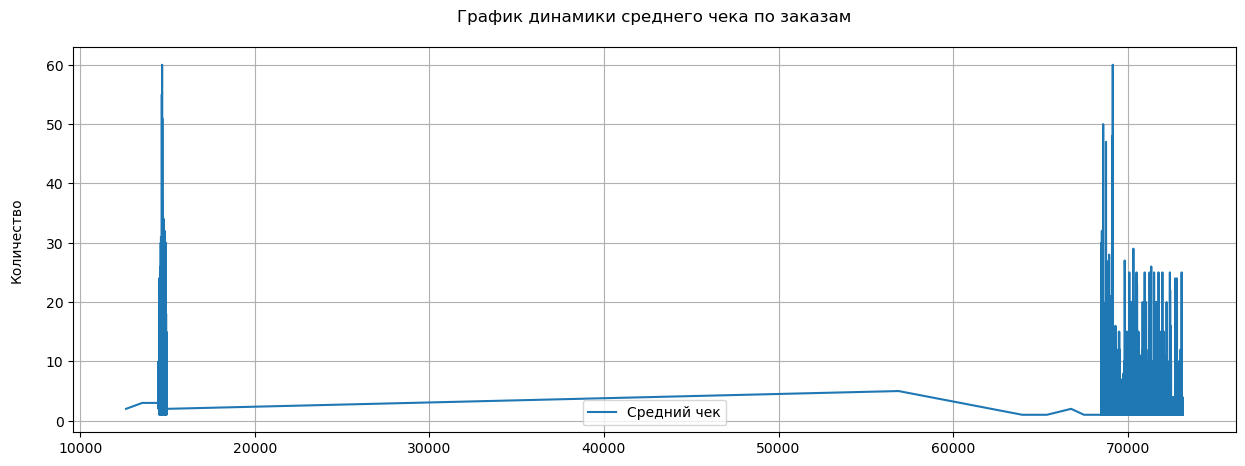

In [94]:
#Построим график распределения среднего чека по заказам
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(data_midle_check.index, data_midle_check['quantity'], label='Средний чек')

plt.legend()
plt.title('График динамики среднего чека по заказам\n  ')
plt.xlabel('\n')
plt.ylabel('Количество\n')
;

In [95]:
#Посмотрим среднее значение
data_midle_check['quantity'].mean()

3.245627093412728

In [96]:
#И медиану
data_midle_check['quantity'].median()

1.0

Значения среднего чека периода варьируются весьма сильно, в график, среднее и медианное значение показывают что в одном заказе покупатели зачастую приобретают от 1 до 3 единиц товара.

###  Сегментация

Сгрупируем данные для RFM-анализа.

In [97]:
#Задаем точку отстчета давности заказов и групируем даныне
NOW = dt.datetime(2019,10,31)
RFM_table=data.groupby('customer_id').agg({'date': lambda x: (NOW - x.max()).days, # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'revenue': lambda x: x.sum()})    # Monetary 

RFM_table['date'] = RFM_table['date'].astype(int)

RFM_table.rename(columns={'date': 'recency', 
                         'order_id': 'frequency',
                         'revenue': 'monetary_value'}, inplace=True)
RFM_table.head()

,recency,frequency,monetary_value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,14,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,256,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,16,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,276,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,31,1,2324.0


Для деление на группы в данной формуле используется деление на квантили. Они помогут разделить на 4 группы пользователй по каждому из 3 признаков, в итоге мы получим 12 групп выделенных по давносте, частоте и денежным тратам. Название сегмента описывает строится следующим образом: первая цифра номер квартиля недавности посещения, вторая -квартиль частоты заказов, и последняя денежные траты. То есть лучшая категория 444 - заказывали недавно, делают это часто и на большие суммы. К примеру 114 - давно не было заказов, они бывают редно, но на большие суммы.

In [98]:
# Задаем квантили
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,109.0,1.0,291.0
0.50,211.0,1.0,672.0
0.75,296.0,1.0,1424.0


In [99]:
# Сконвертируем формат
quantiles = quantiles.to_dict()

RFM_Segment = RFM_table.copy()
# Задаем аргументы x = value, p = recency, monetary_value, frequency, k = quartiles dict
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    

def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
# Формируем датасет
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [100]:
RFM_Segment.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,14,1,555.0,4,1,2,412
001cee7f-0b29-4716-b202-0042213ab038,256,1,442.0,2,1,2,212
00299f34-5385-4d13-9aea-c80b81658e1b,16,1,914.0,4,1,3,413
002d4d3a-4a59-406b-86ec-c3314357e498,276,1,1649.0,2,1,4,214
003bbd39-0000-41ff-b7f9-2ddaec152037,31,1,2324.0,4,1,4,414


Визуализируем полученную сегментацию, построим гистограмму выручки относительно сегментов и диаграмму количкества пользователей относительно сегмента

In [101]:
#Визуализируем
RFM_Segment.groupby(by= 'RFMClass')

fig = px.bar(RFM_Segment, 
             x='RFMClass', 
             y='monetary_value', 
            )
fig.update_layout(xaxis_title='Сегмент',
                  yaxis_title='Выручка',
                  xaxis={'categoryorder':'total descending'})
fig.show()



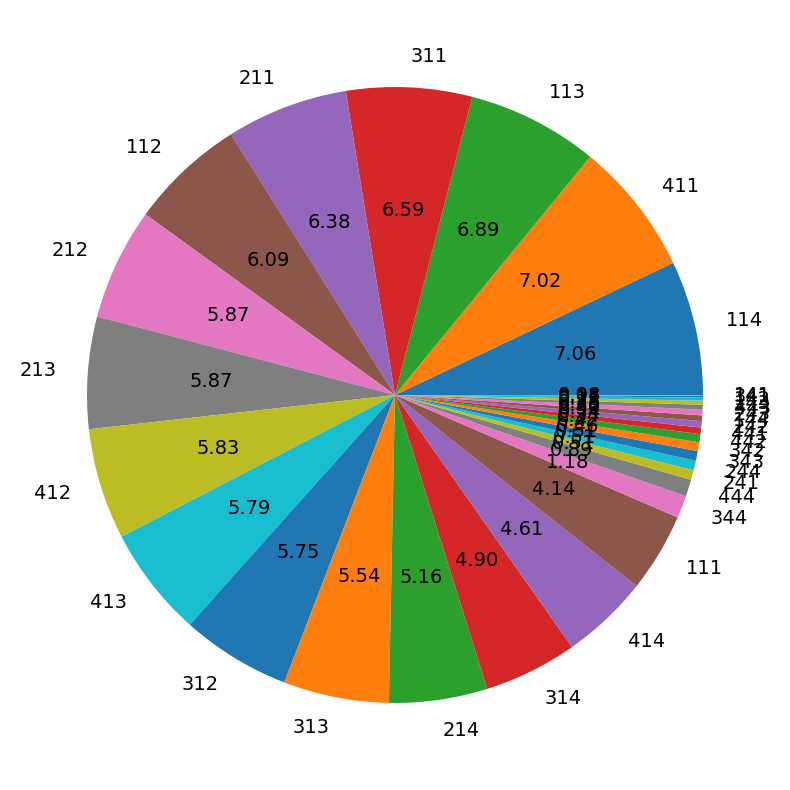

In [102]:
#Визуализируем
plt.figure(figsize=(10,10))
plt.pie(RFM_Segment.RFMClass.value_counts(),
        labels=RFM_Segment.RFMClass.value_counts().index, textprops={'fontsize': 14},
        autopct='%.2f')
plt.show()

Как видно из графиков внимание стоит обратить на 114 когорту покупателей - она лидирует по количеству заказов и приносит наибольшую прибыл. НО так как первые цифры 11 то это не постоянные покупатели, которые заказывали достаточно давно, то есть большинство денег приносят разовые покупатели, стоит маркетологам задуматься над вопросом удержания покупателей. В целом можно заметить что когорты постоянных покупателей замыкают оба графика.  По видимому маркетинговые акции кампании привлекают, но не удерживают покупателей.

На основании данной сегментации мы можем дать отделу маркетинга рекомендации по определенным целевым аудиториям, вот несколько примеров:

In [103]:
#Хотим заинтересовать покупателей находящихся на пороге оттока, вот их индификаторы

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,238,122,141787.0,2,4,4,244
58a4c3cc-504f-43ea-a74a-bae19e665552,288,2,53232.0,2,4,4,244
4d93d3f6-8b24-403b-a74b-f5173e40d7db,371,33,51828.0,1,4,4,144
1b2764ad-9151-4051-a46a-9b01b62e6335,358,1,24370.0,1,1,4,114
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,369,1,22056.0,1,1,4,114
...,...,...,...,...,...,...,...
c3c6e13a-9b7f-419c-8053-0547033efa07,338,1,44.0,1,1,1,111
33375310-60ae-4c95-86f4-7bed8d0b3d3e,310,1,44.0,1,1,1,111
f420bf6d-9985-47bc-95a7-5c640ad6d001,287,1,22.0,2,1,1,211


In [104]:
#Хотим список ушедших клиентов чтобы их вернуть

RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
6644e5b4-9934-4863-9778-aaa125207701,394,1,269.0,1,1,1,111
a576fa59-7b28-4a4c-a496-92f128754a94,394,1,188.0,1,1,1,111
29a514f5-a27e-4939-85d5-874a0c3f7a2c,393,1,193.0,1,1,1,111
eee7b1fa-ba81-4049-add6-370ee5e62e72,392,1,187.0,1,1,1,111
1e17318f-c4f1-4d0f-8ee4-9bf976c5b4ef,392,1,127.0,1,1,1,111
...,...,...,...,...,...,...,...
0e6ed482-a9d9-4c94-a4ff-382502a08d98,307,1,254.0,1,1,1,111
e88af26b-f634-461d-b6c1-c3e7c8121add,306,1,262.0,1,1,1,111
f84d0b80-6d88-4cc6-8f33-8ee4b3c8a5e4,306,1,239.0,1,1,1,111


In [105]:
#Хотим улучшить програмы лояльности для самых верных

clients_loyal= RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False)
clients_loyal

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,238,122,141787.0,2,4,4,244
58a4c3cc-504f-43ea-a74a-bae19e665552,288,2,53232.0,2,4,4,244
4d93d3f6-8b24-403b-a74b-f5173e40d7db,371,33,51828.0,1,4,4,144
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,194,3,30440.0,3,4,4,344
940c175f-ea87-44e0-9e16-0a3d0a9abecd,140,2,20232.0,3,4,4,344
...,...,...,...,...,...,...,...
c147ccde-54bc-43c1-a276-64ebef5beef8,244,2,148.0,2,4,1,241
7f70ecd3-d9f0-46c3-bb20-2cc333b92fa2,99,2,148.0,4,4,1,441
08199320-6a87-4a2c-8565-dfc0c8484184,244,2,134.0,2,4,1,241


В дальнейшем подробнее наиболее лояльных покупателей чтобы узнать структуру их потребления

###  Разделим товары на категории

Сегментируем пользователей по покупаемым товарам. К сожалению деление товаров по категорием отсутствует, а запросы категориального менеджера удовлетворить требуется. Категоризируем товары исходя из названий.

In [106]:
product = data

In [107]:
product['name'] = data['product'].apply(lambda x: x.split(' ')[0:2])
product

,date,customer_id,order_id,product,quantity,price,revenue,month,name
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,"[Комнатное, растение]"
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10,"[Комнатное, растение]"
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,"[Радермахера, d-12]"
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10,"[Хризолидокарпус, Лутесценс]"
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10,"[Циперус, Зумула]"
...,...,...,...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0,329.0,2019-10,"[Мимоза, стыдливая]"
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,404.0,2019-10,"[Таз, пластмассовый]"
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0,2019-10,"[Сумка-тележка, 2-х]"
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,157.0,2019-10,"[Герань, домашняя]"


In [108]:
product

,date,customer_id,order_id,product,quantity,price,revenue,month,name
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,"[Комнатное, растение]"
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10,"[Комнатное, растение]"
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,"[Радермахера, d-12]"
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10,"[Хризолидокарпус, Лутесценс]"
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10,"[Циперус, Зумула]"
...,...,...,...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0,329.0,2019-10,"[Мимоза, стыдливая]"
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,404.0,2019-10,"[Таз, пластмассовый]"
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0,2019-10,"[Сумка-тележка, 2-х]"
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,157.0,2019-10,"[Герань, домашняя]"


In [109]:
# Посмотрим на промежуточный результат
product.head()

,date,customer_id,order_id,product,quantity,price,revenue,month,name
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,"[Комнатное, растение]"
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10,"[Комнатное, растение]"
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,"[Радермахера, d-12]"
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10,"[Хризолидокарпус, Лутесценс]"
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10,"[Циперус, Зумула]"


Сгрупируем товары для того чтобы выделить названия самых популярных товаров

In [110]:
#Cводная таблица продаж по товарам
product = data.pivot_table(index=['product'], values=['revenue', 'price', 'quantity', 'month'], 
                    aggfunc={'revenue': 'sum', 
                             'price': 'mean', 
                             'quantity': 'sum'}).round().sort_values(by = 'revenue', ascending = False)
product = product.reset_index()
product

,product,price,quantity,revenue
0,Простынь вафельная 200х180 см WELLNESS RW180-0...,1852.0,30,53232.0
1,Сумка-тележка 2-х колесная Gimi Argo синяя,1072.0,47,50405.0
2,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см...",4874.0,5,24370.0
3,"Веник сорго с деревянной ручкой с 4-мя швами, ...",540.0,37,20010.0
4,Сумка-тележка 3-х колесная Gimi Tris Floral синяя,2699.0,7,18893.0
...,...,...,...,...
2278,"Огурец Засолочный 0,3 г 4660010776102",10.0,1,10.0
2279,Петрушка Итальянский гигант 2 г 4660010776553,10.0,1,10.0
2280,Морковь Детская сладость 2 г 4660010775921,10.0,1,10.0
2281,"Львиный зев Волшебный ковер 0,05 г 4660010779639",9.0,1,9.0


In [111]:
product['name'] = product['product'].apply(lambda x: x.split(' ')[0])
data['name'] = data['product'].apply(lambda x: x.split(' ')[0])
product

,product,price,quantity,revenue,name
0,Простынь вафельная 200х180 см WELLNESS RW180-0...,1852.0,30,53232.0,Простынь
1,Сумка-тележка 2-х колесная Gimi Argo синяя,1072.0,47,50405.0,Сумка-тележка
2,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см...",4874.0,5,24370.0,Урна
3,"Веник сорго с деревянной ручкой с 4-мя швами, ...",540.0,37,20010.0,Веник
4,Сумка-тележка 3-х колесная Gimi Tris Floral синяя,2699.0,7,18893.0,Сумка-тележка
...,...,...,...,...,...
2278,"Огурец Засолочный 0,3 г 4660010776102",10.0,1,10.0,Огурец
2279,Петрушка Итальянский гигант 2 г 4660010776553,10.0,1,10.0,Петрушка
2280,Морковь Детская сладость 2 г 4660010775921,10.0,1,10.0,Морковь
2281,"Львиный зев Волшебный ковер 0,05 г 4660010779639",9.0,1,9.0,Львиный


In [112]:
#Посчитаем уникальные названия
name = product.pivot_table(
    index ='name', values = 'product', aggfunc='count').sort_values(by = 'product', ascending = False)

print(len(name))

455


In [113]:
#Оставляем товары заказанные более 1 раза
value = 1
name=name.query("product != @value")
print(name.to_string())

                    product
name                       
Рассада                 175
Сушилка                 112
томата                   73
Коврик                   71
Гладильная               70
Муляж                    68
Сумка-тележка            64
Пеларгония               60
Чехол                    52
Штора                    52
Роза                     49
Петуния                  42
Набор                    36
Искусственный            36
Таз                      35
Тарелка                  31
Вешалка                  29
Скатерть                 28
Корзина                  23
Герань                   21
Стремянка                20
Тележка                  19
Салатник                 18
Чайник                   18
Цветок                   18
Однолетнее               16
Подвесное                15
Банка                    14
Флокс                    14
Цикламен                 13
Контейнер                12
Примула                  12
Кружка                   12
Капуста             

In [114]:
#Распределим на категории
#Растения
plants = ['Рассада', 'томата', 'Пеларгония', 'Однолетнее', 'Новогоднее','Циперус','Мединилла','Роза', 'Петуния', 'Герань', 'Цветок', 'Однолетнее ', 'Флокс','Цикламен','Примула', 'Капуста ', 'Калибрахоа', 'Фуксия', 'Пуансеттия', 'Фиалка', 'Вербена', 'Дыня', 'Комнатное', 'Базилик', 'Бегония', 'Бальзамин', 'Бакопа', 'Антуриум', 'Мята', 'Космея', 'Декоративная', 'Хризантема', 'Огурец', 'Петрушка', 'Декабрист', 'Эвкалипт', 'Арбуз', 'Томат', 'Цинния', 'Патиссон', 'Азалия', 'Алиссум', 'Дендробиум', 'Гвоздика', 'Тимьян', 'Лаванда', 'Эхеверия', 'Лавр', 'Спатифиллум', 'Эхеверия', 'Аспарагус', 'Калатея', 'Цинерария', 'Цинерания', 'Эхинокактус', 'Лантана', 'Кореопсис', 'Крассула', 'Аквилегия', 'Аптения', 'Дендробиум', 'Гвоздика', 'Тимьян', 'Лаванда','Лавр', 'Настурция', 'Спатифиллум', 'Розмарин', 'Фаленопсис', 'Календула', 'Зверобой', 'Гортензия', 'Клубника', 'Каланхое', 'Астра', 'Виола', 'Осина', 'Колеус','Земляника', 'Хлорофитум', 'Монарда', 'Афеляндра', 'Многолетнее', 'Цветущее', 'Мирт', 'Седум', 'Газания', 'Салат', 'Гардения', 'Гербера', 'Тагетис', 'Диффенбахия', 'Целозия'       
]
 
#Хозяйственные товары
households = ['Сушилка', 'Гладильная', 'Вешалка', 'Таз', 'Банка', 'Полки', 'Контейнер', 'Швабра', 'Щетка', 'Паста',
              'Щетка-сметка', 'Сметка', 'Ведро', 'Корыто', 'Карниз', 'Подвесное', 'Складная', 'Мусорный', 'Автоматическая',
              'Перчатки', 'Ёрш', 'Ерш', 'Средство', 'Насадка', 'Кофр', 'Весы','Крючок', 'Коробка', 'Веник', 'Комплект', 'Щетка-сметка', 'Скребок', 'Окномойка',  'Бельевые', 'Термометр',  'Вантуз', 'Мешок']

#Сумки
trolley_bag = ['Сумка-тележка', 'Тележка', 'Сумка', 'Этажерка']

#Лестницы
ladder = ['Стремянка', 'Стремянки', 'Стремянка-табурет', 'Лестница-стремянка']

#Для дома
home = ['Набор', 'Муляж','Чехол', 'Искусственный', 'Искусственная', 'Цветок', 'Декоративная', 'Настенная', 'Утюг', 'Вешалка-плечики', 'Вешалка-стойка', 'Вешалки', 'Ерш', 'Дозатор', 'Пылесос',
       'Урна', 'Штанга']

#Текстиль
textile = ['Коврик', 'Ковер',  'Штора', 'Полотенце', 'Простынь', 'Махровое', 'Одеяло', 'Наматрацник', 'Покрывало', 'Подушка']

#Кухонная утварь
kitchen = ['Нож', 'Кружка', 'Салатник', 'Тарелка', 'Чайник', 'Скатерть', 'Салфетка', 'Сковорода', 'Кастрюля', 
           'Термокружка', 'Tepмокружка','Ложка', 'Термос', 'Вилка', 'Стакан', 'Жестяная', 'Лоток', 'Чайный', 'Ковш', 'Кухонное', 'Столовый', 'Соковарка', 'Рыбочистка', 'Термостакан', 'Бидон']


#Присваиваем товарам категории
product['category'] = 'другое'
product.loc[product.query('name == @plants').index, 'category'] = 'растения'
product.loc[product.query('name == @ladder').index, 'category'] = 'лестницы'
product.loc[product.query('name == @households').index, 'category'] = 'хозтовары'
product.loc[product.query('name == @trolley_bag').index, 'category'] = 'сумки'
product.loc[product.query('name == @home').index, 'category'] = 'для дома'
product.loc[product.query('name == @textile').index, 'category'] = 'текстиль'
product.loc[product.query('name == @kitchen').index, 'category'] = 'кухонная утварь'

In [115]:
#Посмотрим промежуточный результат
product

,product,price,quantity,revenue,name,category
0,Простынь вафельная 200х180 см WELLNESS RW180-0...,1852.0,30,53232.0,Простынь,текстиль
1,Сумка-тележка 2-х колесная Gimi Argo синяя,1072.0,47,50405.0,Сумка-тележка,сумки
2,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см...",4874.0,5,24370.0,Урна,для дома
3,"Веник сорго с деревянной ручкой с 4-мя швами, ...",540.0,37,20010.0,Веник,хозтовары
4,Сумка-тележка 3-х колесная Gimi Tris Floral синяя,2699.0,7,18893.0,Сумка-тележка,сумки
...,...,...,...,...,...,...
2278,"Огурец Засолочный 0,3 г 4660010776102",10.0,1,10.0,Огурец,растения
2279,Петрушка Итальянский гигант 2 г 4660010776553,10.0,1,10.0,Петрушка,растения
2280,Морковь Детская сладость 2 г 4660010775921,10.0,1,10.0,Морковь,другое
2281,"Львиный зев Волшебный ковер 0,05 г 4660010779639",9.0,1,9.0,Львиный,другое


In [116]:
#Добавим в основную базу, так как из предыдущей мы вырезали часть позиций
data['category'] = 'другое'
data.loc[data.query('name == @plants').index, 'category'] = 'растения'
data.loc[data.query('name == @ladder').index, 'category'] = 'лестницы'
data.loc[data.query('name == @households').index, 'category'] = 'хозтовары'
data.loc[data.query('name == @trolley_bag').index, 'category'] = 'сумки'
data.loc[data.query('name == @home').index, 'category'] = 'для дома'
data.loc[data.query('name == @textile').index, 'category'] = 'текстиль'
data.loc[data.query('name == @kitchen').index, 'category'] = 'кухонная утварь'

In [117]:
#Посмотрим какие доли приходятся на категории
category = data.groupby(['category']).agg({'product':'count', 'revenue':'sum'}).reset_index()
category['%_всех_товаров'] = (category['product'] / category['product'].sum() * 100).round(2)
category['%_всей_выручке'] = (category['revenue'] / category['revenue'].sum() * 100).round(2)
category.sort_values(by = 'product', ascending = False)

,category,product,revenue,%_всех_товаров,%_всей_выручке
4,растения,2255,433601.0,47.52,15.25
7,хозтовары,717,816019.0,15.11,28.70
1,другое,540,253236.0,11.38,8.91
0,для дома,431,223639.0,9.08,7.87
5,сумки,321,501961.0,6.77,17.66
2,кухонная утварь,231,198381.0,4.87,6.98
6,текстиль,206,319508.0,4.34,11.24
3,лестницы,44,96445.0,0.93,3.39


Результаты немного неожиданыне: растения составляют почти половину товарных позиций, по при этом не приносят значительного количества денег. При этом хозтовары, сумки и текстиль приносят значительные средства, не занимаю большого количества ассортимента.

In [118]:
#Построим графики динамики выручки категорий 
category_plot = data.groupby(['category', 'month']).agg({'revenue':'sum'}).reset_index()

fig = px.bar(
    category_plot,
    x='month',
    y='revenue',
    color='category',
    title='Динамика выручки по категориям наименований',
)

fig.show() 

Как мы видели ранее прибыль падает, при этом прибыль в различных категорияъх весьма волноообразна. Но основании данного графика будет выдвинута следующпая статистическая далее теория.

In [119]:
category_plot

,category,month,revenue
0,для дома,2018-10,32120.0
1,для дома,2018-11,56723.0
2,для дома,2018-12,23423.0
3,для дома,2019-01,9107.0
4,для дома,2019-02,25496.0
...,...,...,...
99,хозтовары,2019-06,34888.0
100,хозтовары,2019-07,70237.0
101,хозтовары,2019-08,40231.0
102,хозтовары,2019-09,44411.0


### Подробнее проанализируем наиболее лояльных покупателей

Изучим структуру потребления лояльных потребителей

In [120]:
clients_loyal['customer_id']= clients_loyal.index

In [121]:
clients_loyal2=pd.concat([clients_loyal['customer_id']], axis= 1 )
clients_loyal2.head()

,customer_id
customer_id,
c971fb21-d54c-4134-938f-16b62ee86d3b,c971fb21-d54c-4134-938f-16b62ee86d3b
58a4c3cc-504f-43ea-a74a-bae19e665552,58a4c3cc-504f-43ea-a74a-bae19e665552
4d93d3f6-8b24-403b-a74b-f5173e40d7db,4d93d3f6-8b24-403b-a74b-f5173e40d7db
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,498f12a4-6a62-4725-8516-cf5dc9ab8a3a
940c175f-ea87-44e0-9e16-0a3d0a9abecd,940c175f-ea87-44e0-9e16-0a3d0a9abecd


In [122]:
#Сформирует фрейм
data_loyal=data[data['customer_id'].isin(clients_loyal2['customer_id'])]
data_loyal.head()

,date,customer_id,order_id,product,quantity,price,revenue,month,name,category
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0,674.0,2018-10,Чехол,для дома
12,2018-10-01 13:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,Чехол Eurogold Clean Basic хлопок для досок 12...,1,187.0,187.0,2018-10,Чехол,для дома
20,2018-10-02 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,Чехол для гладильной доски Festival 137x60 см ...,1,1162.0,1162.0,2018-10,Чехол,для дома
21,2018-10-02 10:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68491,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1049.0,1049.0,2018-10,Сумка-тележка,сумки
42,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 3-х рядная деревянная 450 мм (пло...,15,49.0,735.0,2018-10,Щетка-сметка,хозтовары


In [123]:
#Построим график выручки по категориям
category_plot2 = data_loyal.groupby(['category', 'month']).agg({'revenue':'sum'}).reset_index()

fig = px.bar(
    category_plot2,
    x='month',
    y='revenue',
    color='category',
    title='Динамика выручки по категориям наименований',
)

fig.show() 

Покупательский спрос лояльных потребителей весьма варьетивный, не получиться выделить явно доминирующую категорию.

''

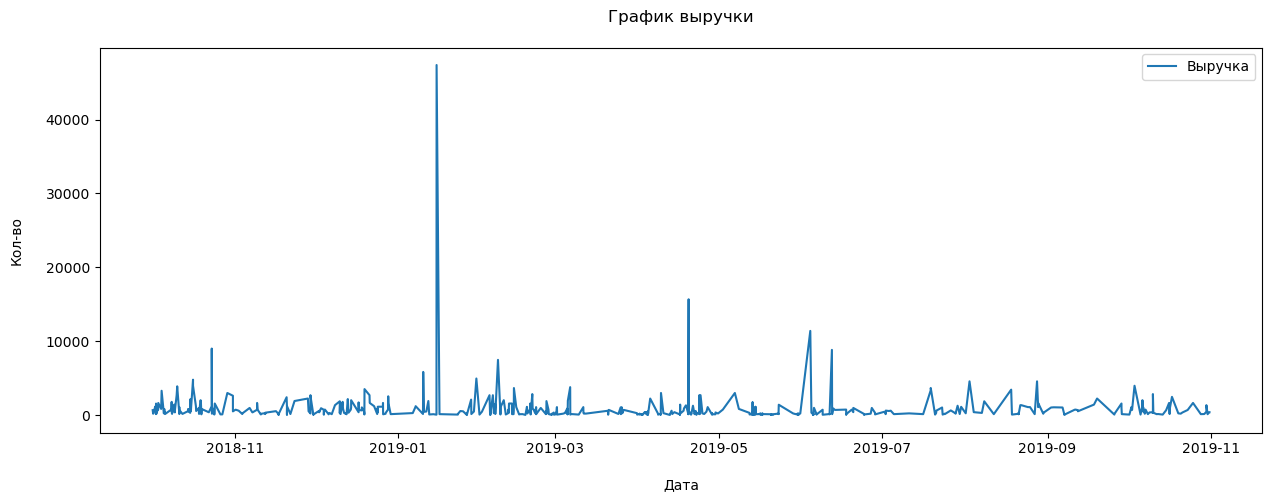

In [124]:
#Посмотрим выручку от постоянных клиентов
plt.figure(figsize=(15,5))
plt.plot(data_loyal['date'], data_loyal['revenue'], label='Выручка')

plt.legend()
plt.title('График выручки\n  ')
plt.xlabel('\nДата')
plt.ylabel('Кол-во\n')
;


Выручка тоже весьма сильно колеблиться

In [125]:
#Посмотрим средние показатели
data_loyal.describe()

,order_id,quantity,price,revenue
count,882.000000,882.000000,882.000000,882.000000
mean,45628.860544,1.956916,423.140590,631.520408
std,27682.854631,2.667831,693.689217,1964.079913
min,14481.000000,1.000000,14.000000,15.000000
25%,14765.250000,1.000000,90.000000,120.000000
50%,68604.500000,1.000000,142.000000,188.000000
75%,70392.500000,1.000000,395.000000,598.750000
max,73164.000000,27.000000,4957.000000,47385.000000


Количество единиц артикула в заказе (2 против 2,5) и сумма(423 против 462) уступают средним показателям по генеральной совокупности, но выручка больше (631 против 599).

In [126]:
category_plot3 = data_loyal.groupby(['month']).agg({'order_id':'count'}).reset_index()
fig = px.bar(
    category_plot3,
    x='month',
    y='order_id',
    title='Динамика заказов',)

fig.show() 

Динамика заказов также крайне не стабильна, от генеральной совокупности отличается  заментными всплесками в апреле и мае.

Подведем промежуточный итог: наиболее лояльные покупатели данного интернет-магазина крайне разносторонние, по видимому люди настроения ибо покупают часто, но товары разных категорий и в небольшом количестве.

## Статистические гипотезы

### Сезонная зависимость у покупателей категории - растения

Категория растения колеблиться в течении года. Выделим отдельно весенний период, то есть посевную(предположим что основная часть покупателей дачники и они озимые не сажают). Остальные месецы года выделим в отдельнвй блок.

In [127]:
#Сегментируем по сезонам
category_plants= category_plot.query("category == 'растения'")
plants_spring=category_plants.iloc[5:8]
plants_other=category_plants.iloc[[0, 1, 2, 3, 4 , 8, 9, 10 ,11, 12]]

Формируем гипотезы:  
Нулевая - статистически значимой разницы в продажах между весенними месяцами и остальным годом нет  
Альтернативная - в продажах между весенними месяцами и остальным годом присутствует статичтисески значимая разница, что говорим о наличии сезонности

In [128]:
alpha = 0.05 # показатель статистической значимости

results = st.ttest_ind(plants_spring['revenue'], plants_other['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00019136756222643255
Отвергаем нулевую гипотезу


Итог: статитстическа значимая разница присутствует, в продажах товаров категории растения присутстует сезонность в весенние месяцы.

### Разные категории покупателей имеют разные средние стоимости

Сраним группы покупателей,  объединенных по сумме трат и  различной частотой/давностью заказа, на наличие статистически значимой разности в выручке. 

In [129]:
#Сргупируем даныне
RFM_Segment_grouped=RFM_Segment.pivot_table(index=['RFMClass'], values=['recency', 'frequency', 'monetary_value'], 
                    aggfunc={
                             'recency': 'mean',
                             'frequency': 'mean',
                             'monetary_value': 'mean'}).round()
RFM_Segment_grouped

,frequency,monetary_value,recency
RFMClass,,,
111,1.0,159.0,341.0
112,1.0,469.0,345.0
113,1.0,970.0,343.0
114,1.0,2901.0,349.0
141,2.0,268.0,354.0
142,2.0,580.0,344.0
143,2.0,1057.0,349.0
144,7.0,9657.0,340.0
211,1.0,140.0,250.0


Используем гипотеза о равенстве средних двух генеральных совокупностей и попарно сравним относящие к соседним по выручке группам.  
Формируем гипотезы:    
Нулевая - статистически значимой разницы  в смежных по выручке группах нет  
Альтернативная - смежные по выручке группы статистически значимо различаются в показатели выручки

Сравним среднее значение выручки групп относящиеся к первому квартилю выручки (111,141,211,241,311,341,411,441) с групами второго квартиля (112,142,212,242,312,342,412,442)

In [130]:
sample_1 = [159, 268, 140, 219, 147, 264, 138, 222]
sample_2 = [469, 580, 477, 511, 453, 513, 486, 493]

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.465249650811738e-09
Отвергаем нулевую гипотезу


Статистически знчимые различия между группами 1 и 2 квартиля по выручке присутствуют, что доказывает состоятельность даннлой модели сегментирования. Для того чтобы быть уверенным в данном утверждении далее следуют сравнения 2 и 3, 3 и 4 квартилей, во всех случаях нулевая гипотеза была отвергнута.

Сравним среднее значение выручки групп относящиеся к второму квартилю выручки (112,142,212,242,312,342,412,442) с групами третьего квартиля (113,143,213,243,313,343,413,443)

In [131]:
sample_1 = [469, 280, 477, 511, 453, 513, 486, 493]
sample_2 = [970, 1057, 967, 903, 946, 1057, 995, 966]

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.1317525286135047e-10
Отвергаем нулевую гипотезу


Сравним среднее значение выручки групп относящиеся к третьему квартилю выручки (113,143,213,243,313,343,413,443) с групами яетвертого квартиля (114,144,214,244,314,344,414,444)

In [132]:
sample_1 = [970, 1057, 967, 903, 946, 1057, 995, 966]
sample_2 = [2901, 9657, 2520, 18487, 2621, 4616, 2689, 4097]

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.024905359337515143
Отвергаем нулевую гипотезу


Данная проверка гипотиз подтваржадет состоятельность сегментирования. В тоерии надо было сранить группы по даности и частоте заказов на наличие статистически значимой разности, но я сомневался в обстоятельности своих суждений, так как разница очевидна из таблицы выше, а следовательно данная гипотеза может быть рне принята. Если необходи могу дополнить необходимыми проверками.

### Вывод

Интернет-магазин "Пока все еще тут" столкнулся с проблемами падения выручки вполне обоснованно:  
Отсутствие устойчевой базы покупателей - клиентов совершающих покупки регулярно скорее всего привлекают некие прочие факторы, нежели ассортимент магазина. Так как специфика их заказов крайне хаотична: разные стоимости, товарные категории. Единсвенное что их объединяет, то что они относительно регулярно пользуются сервисом. Для стабильной и долгосройной стратегии экономического развитя необходимо иметь якорные товары/услуги постоянно привлекающие определенную категорию покупателей.
Низкие показатели розничной торговли - не высокий средний чек, редкость заказов, не большая выручка. Данные метрики рисуют нам портрет покупателя среднестатистического покупателя который разово купил немного недорого товара и перестал пользоваться услуагми интернет-магазина.  
Сезонность - категория растения логично имеет сезонный спрос, но в остальное время года ее не заменяют полноценно другие категории товаров.График показывает нам что растения мало покупают осенью и зимой, что весьма логично, но для сохранения объемов выручки их должна заменить другая категория.

В базе данных помимо значительного количества неявных дубликатов отсутсвую крайне выжные для розничной торговли показатели: средний чек и выручка. Было бы неплохо скоректировать ведение базы данных так что данные показатели там фиксировались и не появлялись дубликаты.

### Рекомендации для категорийного менеджера:  
Серьзено? У вас есть категорийный менеджер, но нет деления товаров на категории в базе данных? Так вот оно - ловите. Товары сегментированы на категории:'другое','растения','лестницы', 'хозтовары', 'сумки', для дома', 'текстиль' и 'кухонная утварь' (не понятно чем этот парень раньше занимался, полюбому чей-то родственник).  
На что стоит обратить внимание: категория растения занимает почти половину аасортиментного рядя и при этом приносит только 15% выручки(не будем забывать про сезонность покупок). В то время как текстиль, хозяйственные товары и сумки приносят нелохие деньги, не захламляя ассортиментный ряд. Было бы неплохо подмать над сокращением категории растения в пользую увеличения объемов текстиля, сумок и хозтоваров при сохранении прежних складских объемов.

### Рекомендации для круководителя маркетинга: 
Стоит начать активное взаимодействие с 114 категорией покупателей, так как она приносит наибольшую выручку - это люди редко и давно совершавшие покупки на значиьельные суммы. Средняя давность заказов(если считать от последнего дня в базе данных_ составляет 349 дней, при этом средние количество заказаов - 1. Однако их количество составляет 7,06% всех пользователей и приносит 485к выручки(за указанный период). Повторное возвращение данныъ пользователй станет весомым тригером для развития магазина.  
Так же стоит формирования якорной категории товаров для наиболее лояльных пользователей, их спросы весьма хаотичны, что приводит к колебаниям выручки магазина, как видно из графиков в сезон они потребляют категорию растения, в остальное время хозтовары, текстиль и сумки, но спрос их крайне вартиативен. Скорее всего он был обусловлен проведеникм маккетинговых акций на данные товары. Стоит с большей стабильнойстью подогревать интерес лояльных потребителей к несезонным товарам в течении всего года.